<a href="https://colab.research.google.com/github/xalejandrow/hypothesis-testing-exercises-project-with-python/blob/main/export/hypothesis-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHESIS TESTING

### Density Curves

Having frequency histograms is a good way of looking at how is our data distributed. But at some point, we might want to see what percentage of our data falls into each of the variable's categories. In that case we can build a relative frequency histogram, which will shows us the percentages instead of the quantities. But as we have more and more data we might want to see smaller bins in our histogram so that we can see the distribution much clear. As we continue having more and more data, maybe we want to see even more thin bins which will get us into a point where we approach to an infiinite number of categories and the best way of looking at it would be to connect the top of the bars that you will actually get a curve. This is called the density curve.

![density_curve.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/density_curve.jpg?raw=1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
my_array = ([1,3,4,5,3,4,5,7,8,6,3,2,4,6,8,5,2,4,6,3,6,4,2,4,7,3,1])

In [6]:
np.mean(my_array)

4.296296296296297

(array([2., 3., 5., 0., 6., 3., 0., 4., 2., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

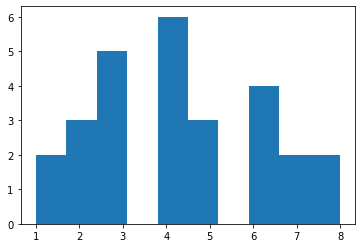

In [5]:
plt.hist(my_array)

(array([2., 0., 3., 0., 5., 0., 6., 0., 3., 0., 4., 0., 2., 0., 2.]),
 array([1.        , 1.46666667, 1.93333333, 2.4       , 2.86666667,
        3.33333333, 3.8       , 4.26666667, 4.73333333, 5.2       ,
        5.66666667, 6.13333333, 6.6       , 7.06666667, 7.53333333,
        8.        ]),
 <BarContainer object of 15 artists>)

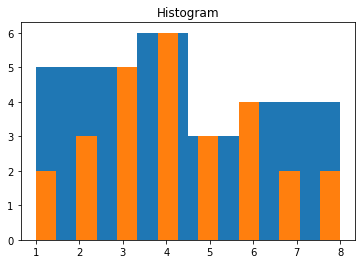

In [9]:
plt.hist(my_array, bins=6)
plt.title('Histogram')
plt.hist(my_array, bins=15)

**Probability from density curve:**

Let's see an example on how to calculate probabilities from density curves:

We have a set of women's heights that are normally distributed with a mean of 155 centimeters and a standard deviation of 15 centimeters. The height of a randomly selected women from this set will be denoted as $W$.

Find and interpret $P(W > 170)$

![density_probability_problem.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/density_probability_problem.jpg?raw=1)

### Central Limit Theorem


When we draw samples of independent random variables (drawn from any single distribution with a finite variance), their sample mean tends toward the population mean and their distribution approaches a normal distribution as sample size increases, regardless of the distribution from which the random variables were drawn. Their variance will approach the population variance divided by the sample size.

The central limit theorem describes the shape of the distribution of sample means as a Gaussian or Normal Distribution.
The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution.

The central limit theorem does not state anything about a single sample mean, instead it states something about the shape or the distribution of sample means.

For example, let's say we have a fair and balanced 6-sided die. The result of rolling the die has a uniform distribution on $[1,2,3,4,5,6]$. The average result from a die roll is $(1+2+3+4+5+6)/6 = 3.5$

If we roll the die $10$ times and average the values, then the resulting parameter will have a distribution that begins to look similar to a normal distribution, again centered at $3.5$.

If we roll the die $100$ times and average the values, then the resulting parameter will have a distribution that behaves even more similar to a normal distribution, again centered at $3.5$, but now with decreased variance.

![central_limit_theorem.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/central_limit_theorem.jpg?raw=1)

### Sampling Methods

Let's imagine we have a population of students. For that population we can calculate parameters, for example the age mean, or the grades standard deviation. These are all population parameters or truths about that population. Sometimes we might not know the population parameter, so the way to estimate that parameter is by taking a sample. 

The sampling method is the process of studying the population by gathering information and analyzing that data. It refers to how members from that population are selected for the study.

**Non-Representative Sampling:**

The non-representative sampling method is a technique in which the researcher selects the sample based on subjective judgment rather than the random selection. Not all the members of the population have a chance to participate in the study.


-Convenience Sampling = Picks samples that are most convenient, like people that can be easily approached.

-Consecutive Sampling = Picks a single person or a group of people for sampling. Then the researcher researches for a period of time to analyze the result and move to another group if needed.

-Purposive Sampling = Picks samples for a specific purpose. An example is to focus on extreme cases. This can be useful but is limited because it doesn't allow you to make statements about the whole population.

-Snowball Sampling = In this method, the samples have traits that are difficult to find. So, each identified member of a population is asked to find the other sampling units. Those sampling units also belong to the same targeted population.

**Representative Sampling:**

-Simple Random Sampling = Pick samples (psuedo)randomly. Every item in the population has an equal and likely chance of being selected in the sample.

-Systematic Sampling = Pick samples with a fixed interval. For example every 10th sample $(0, 10, 20, etc.)$. It is calculated by dividing the total population size by the desired population size.

-Stratified Sampling = The total population is divided into smaller groups formed based on a few characteristics in the population. Pick the same amount of samples from each of the different groups (strata) in the population.

-Cluster Sampling = Divide the population into groups (clusters) and pick samples from those groups. The cluster or group of people are formed from the population set. The group has similar significatory characteristics. Also, they have an equal chance of being a part of the sample. This method uses simple random sampling for the cluster of population.

Let´s see some examples of how to get samples.

In [10]:
# Convenience samples
convenience_samples = normal_dist[0:5]

# Purposive samples (Pick samples for a specific purpose)
# In this example we pick the 5 highest values in our distribution
purposive_samples = normal_dist.nlargest(n=5)

# Simple (pseudo)random sample
random_samples = normal_dist.sample(5)

# Systematic sample (Every 2000th value)
systematic_samples = normal_dist[normal_dist.index % 2000 == 0]

# Stratified Sampling
# We will get 1 person from every classroom in the dataset

df = pd.read_csv('dataset.csv')

strat_samples = []

for classroom in df['Classroom'].unique():
    samp = df[df['Classroom'] == classroom].sample(1)
    strat_samples.append(samp['Average_grade'].item())
    
print('Stratified samples:\n\n{}\n'.format(strat_samples))

# Cluster Sampling
# Make random clusters of ten people (Here with replacement)
c1 = normal_dist.sample(10)
c2 = normal_dist.sample(10)
c3 = normal_dist.sample(10)
c4 = normal_dist.sample(10)
c5 = normal_dist.sample(10)


# Take sample from every cluster (with replacement)
clusters = [c1,c2,c3,c4,c5]
cluster_samples = []
for c in clusters:
    clus_samp = c.sample(1)
    cluster_samples.extend(clus_samp)
print('Cluster samples:\n\n{}'.format(cluster_samples))    

NameError: name 'normal_dist' is not defined

**Imbalanced datasets**


An imbalanced dataset is a dataset where classes are distributed unequally. An imbalanced data can create problems in the classification task. If we are using accuracy as a performance metric, it can create a huge problem. Let’s say our model predicts if a bank transaction was a fraud transaction or a legal transaction. If the total legal transactions represented 99.83%, using an accuracy metric on the credit card dataset will give 99.83% accuracy, which is excellent. Would it be a good result? No.

For an imbalanced dataset, other performance metrics should be used, such as the Precision-Recall AUC score, F1 score, etc. Moreover, the model will be biased towards the majority class. Since most machine learning techniques are designed to work well with a balanced dataset, we must create balanced data out of an imbalanced dataset, but first we must split the dataset into training and testing because the change is only for the training purpose.

A common way to deal with imbalanced datasets is **resampling.** Here are two possible resampling techniques:

-Use all samples from our more frequently occuring event and then randomly sample our less frequently occuring event (with replacement) until we have a balanced dataset.

-Use all samples from our less frequently occuring event and then randomly sample our more frequently occuring event (with or without replacement) until we have a balanced dataset.



### BIAS, MSE, SE

**Bias** is the difference between the calculated value of a parameter and the true value of the population parameter being estimated.
  We can say that it is a measure of how far the sample mean deviates from the population mean. The sample mean is also called Expected value.

  For example, if we decide to survey homeowners on the value of their houses and only the wealthiest homeowners respond, then our home value estimate will be **biased** since it will be larger thant the true value for our population.

Let's see how would we calculate the population mean, expected value and bias using Python:

In [ ]:
# Take sample
df_sample = df.sample(100)

# Calculate Expected Value (EV), population mean and bias
ev = df_sample.mean()[0]
pop_mean = df.mean()[0]
bias = ev - pop_mean

print('Sample mean (Expected Value): ', ev)
print('Population mean: ', pop_mean)
print('Bias: ', bias)

**Mean Squared Error (MSE)** is a formula to measure how much estimators deviate from the true distribution. This can be very useful evaluating regression models.

**Standard Error (SE)** is a formula to measure how spread the distribution is from the sample mean.

In [ ]:
from math import sqrt
from scipy.stats import sem

Y = 100 # True Value
YH = 85 # Predicted Value

# MSE  
def MSE(Y, YH):
    return np.square(YH - Y).mean()

# RMSE 
def RMSE(Y, YH):
    return sqrt(np.square(YH - Y).mean())


print('MSE: ', MSE(Y, YH))
print('RMSE: ', RMSE(Y, YH))

#SE

norm_sample = normal_dist.sample(100)

print('Standard Error of normal sample: ', sem(norm_sample))

### Introduction to confidence levels and confidence intervals

To deal with uncertainty, we can use an interval estimate. It provides a range of values that best describe the population. 
To develop an interval estimate we first need to learn about confidence levels.

**Confidence Levels**



A confidence level is the probability that the interval estimate will include the population parameter (such as the mean).

A parameter is a numerical description of a characteristic of the population.

![hypothesis_testing_standard_normal_distribution.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/hypothesis_testing_standard_normal_distribution.jpg?raw=1)

Sample means will follow the normal probability distribution for large sample sizes $(n>=30)$

To build an interval estimate with a 90% confidence level

Confidence level corresponds to a z-score from the standard normal table equal to $1.645$

![hypothesis_testing_confidence_interval.png](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/hypothesis_testing_confidence_interval.jpg?raw=1)

**Confidence Interval**


A confidence interval is a range of values used to estimate a population parameter and is associated with a specific confidence level.
The confidence interval needs to be described in the context of several samples.

Lets build a confidence interval around a sample mean using these equations:
    
$x̄ ± z c$
    
Where:
    
$x̄$ = the sample mean

$z$ = the z-score, which is the number of standard deviations based on the confidence level

$c$ = the standard error of the mean

Select 10 samples and construct 90% confidence intervals around each of the sample means.
Theorethically, 9 of the 10 intervals will contain the true population mean, which remains unknown.

![hypothesis_testing_confidence_interval_example.jpg](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/hypothesis_testing_confidence_interval_example.jpg?raw=1)

Do not misinterpret the definition of a confidence interval:

False: 'There is a 90% probability that the true population mean is within the interval'.

True: 'There is a 90% of probability that any given confidence interval from a random sample will contain the true population mean.'


To summarize, when we create a confidence interval, it's important to be able to interpret the meaning of the confidence level we used and the interval that was obtained. 
The confidence level refers to the long-term success rate of the method, which means, how often this type of interval will capture the parameter of interest.
A specific confidence interval gives a range of plausible values for the parameter of interest.

### Steps of formulating a hypothesis

Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.

For example, when we say that boys are taller than girls. This assumption needs some statistic way to prove it, we need a mathematical conclusion what ever we are assuming is true.

Hypotheses are claims, and we can use statistics to prove or disprove them. Hypothesis testing structures the problems so that we can use statistical evidence to test these claims and check if the claim is valid or not.


**Steps:**

1. Defining hypothesis

2. Assumption check

3. Set the significance levels

4. Selecting the proper test

5. Carrying out the hypothesis testing and calculate the test statistics and corres­­po­nding P-va­lue

6. Compare P-value with signif­icance levels and then decide to accept or reject null hypothesis

**1. Defining our null and alternative hypothesis**

First of all, we need to understand which scientific question we are looking for an answer to, and it should be formulated in the form of the Null Hypothesis ($H₀$) and the Alternative Hypothesis ($H₁$ or $Hₐ$). 

What is the null hypothesis? ($H₀$)

The null hypothesis is a statement about a population parameter, the statement assumed to be true before we collect the data. We test the likelihood of this statement being true in order to decide whether to accept or reject our alternative hypothesis. It can be thought of as the 'control' of the experiment and it usually has some equal sign ($>=, <=, =$)

What is the alternatuve hypothesis? ($Hₐ$)

A statement that directly contradicts the null hypothesis. This is what we want to prove to be true with our collected data. Can be thought of as the 'experiment'. It usually has the opposite sign of the null hypothesis.


**Fact:** Sample statistics is not what should be involved in our hypothesis. Our hypothesis are claims about the population that we want to study. Please remember that $H₀$ and $Hₐ$ must be mutually exclusive, and $Hₐ$ shouldn’t contain equality.

**2. Assumption Check**

To decide whether to use the parametric or nonparametric version of the test, we should verify if:

-Observations in each sample are independent and identically distributed (IID).

-Observations in each sample are normally distributed.

-Observations in each sample have the same variance.

The next thing we do is set up a threshold known as the significance level.

**3. Level of Significance**



Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.

The level of significance is defined as the fixed probability of wrong elimination of null hypothesis when in fact, it is true. Level of significance $α$ (alpha) is the probability of making a type 1 error (false positive). The probability for the confidence interval is a complement to the significance level. 
A $(1-α)$ confidence interval has a significance level equal to $α$.

Having a 95% probability that any given confidence interval will contain the true population mean, there is a 5% chance that it wont.
This 5% is known as the level of significance.

**4. Selecting the proper test**

A variety of statistical procedures exist. The appropriate one depends on the research question(s) we are asking and the type of data we collected. We need to analyze how many groups are being compared and whether the data are paired or not. To determine whether the data is matched, it is necessary to consider whether the data was collected from the same individuals.

**T-Test** : for 1 independent variable with 2 categories, and the target variable.

When we wish to know whether the means of two groups in a students classroom (male and female in a gender variable) differ, a t test is appropriate. In order to calculate a t test, we need to know the mean, standard deviation, and number of individuals in each of the two groups. An example of a t test research question is “Is there a significant difference between the writing scores of boys and girls in the classroom?” A sample answer might be: “Boys $(M=5.67, SD=.45)$ and girls $(M=5.76, SD=.50)$ score similarly in writing, $t(35)=.54$, $p>.05$.” [Note: The $(35)$ is the degrees of freedom for a t test. It is the number of individuals minus the number of groups (always 2 groups with a t-test). In this example, there were 37 individuals and 2 groups so the degrees of freedom is $37-2=35$.] Remember, a t test can only compare the means of two groups of an independent variable (for example gender) on a single dependent variable (for example writing score).

A t-distribution is flatter than a normal distribution. As the degrees of freedom increase, the shape of the t-distribution becomes similar to a normal distribution. With more than 30 degrees of freedom (sample size of 30 or more) the two distributions are practically identical.

Types of T-test:

-Two sample t-test: If two indepe­ndent groups have different mean

-Paired T-test: if one groups have different means at different times

-One Sample T-test: mean of a single group against a known mean


Assump­tions about data

1. indepe­ndent

2. normally distri­buted

3. have a similar amount of variance within each group being compared


One sample t-test: The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

Let's imagine we have a small dataset with 10 ages and we are checking whether the average age is 30 or not. We could solve it this way:


```py
    from scipy.stats import ttest_1samp
    import numpy as np
    ages = np.genfromtxt(“ages.csv”)
    print(ages)
    ages_mean = np.mean(ages)
    print(ages_mean)
    tset, pval = ttest_1samp(ages, 30)
    print(“p-values”,pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
      print(" we are rejecting null hypothesis")
    else:
      print("we are accepting null hypothesis")
```


Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

For example if we would want to see if there is any association between week1 and week2 we could do it with the following code:



```py
    from scipy.stats import ttest_ind
    import numpy as np

    week1 = np.genfromtxt("week1.csv",  delimiter=",")
    week2 = np.genfromtxt("week2.csv",  delimiter=",")
    print(week1)
    print("week2 data :-\n")
    print(week2)
    week1_mean = np.mean(week1)
    week2_mean = np.mean(week2)
    print("week1 mean value:",week1_mean)
    print("week2 mean value:",week2_mean)
    week1_std = np.std(week1)
    week2_std = np.std(week2)
    print("week1 std value:",week1_std)
    print("week2 std value:",week2_std)
    ttest,pval = ttest_ind(week1,week2)
    print("p-value",pval)
    if pval <0.05:
      print("we reject null hypothesis")
    else:
      print("we accept null hypothesis")
  ```


Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

$H0$ :- means difference between two sample is 0

$H1$:- mean difference between two sample is not 0

Let's try executing the following code example:

In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv("../assets/blood_pressure.csv")

df[['bp_before','bp_after']].describe()
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0011297914644840823
reject null hypothesis



**F-TEST (ANOVA Analysis)**

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time. Unlike the t-distributions, the F-distribution does not have any negative values because between and within-group variability are always positive due to squaring each deviation.

One-way Anova : One independent variable with more than 2 categories, and the target variable.

If we have one independent variable (with three or more categories) and one dependent variable, we do a one-way ANOVA. A sample research question is, “Do Doctors, teachers, and engineers differ on their opinion about a tax increase?” A sample answer is, “Teachers $(M=3.56, SD=.56)$ are less likely to favor a tax increase than doctors $(M=5.67, SD=.60)$ or engineers $(M=5.34, SD=.45)$, $F(2,120)=5.67$, $p<.05$.” [Note: The $(2,207)$ are the degrees of freedom for an ANOVA. The first number is the number of groups minus 1. Because we had three professions it is 2, because 3-1=2. The second number is the total number of individuals minus the number of groups. Because we had 210 subject and 3 groups, it is 207 (210 - 3)]. 

Code example: there are 3 different category of plant and their weight and need to check whether all 3 group are similar or not.

In [ ]:
df_anova = pd.read_csv('../assets/PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


Two-way Anova : More than 1 independent variable with two or more categories each, and the target variable.

A two-way ANOVA has three research questions, one for each of the two independent variables and one for the interaction of the two independent variables. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

Sample Research Questions for a Two-Way ANOVA:
Do teachers, doctors and engineers differ on their opinion about a tax increase?
Do males and females differ on their opinion about a tax increase?
Is there an interaction between gender and profession regarding opinions about a tax increase?

A two-way ANOVA has three null hypotheses, three alternative hypotheses and three answers to the research question.

Assump­tions about data:

1. each data $y$ is normally distri­buted

2. the variance of each treatment group is same

3. all observ­ations are indepe­ndent

Code example: Let’s take a look at the Grand mean crop yield (the mean crop yield not by any sub-group), as well the mean crop yield by each factor, as well as by the factors grouped together.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


**Chi-square**

We might count the incidents of something and compare what our actual data showed with what we would expect. Suppose we surveyed 45 people regarding whether they preferred rock, reggae, or jazz as their favorite music type. If there were no preference, we would expect that 15 would select rock, 15 would select reggae, and 15 would select jazz. Then our sample indicated that 30 like rock, 5 like reggae and 10 like jazz. We use a chi-square to compare what we observe (actual) with what we expect. A sample research question would be: “Is there a preference for the rock, reggae or jazz music?” A sample answer is “There was not equal preference for rock, reggae and jazz. 

Just as t-tests tell us how confident we can be about saying that there are differences between the means of two groups, the chi-square tells us how confident we can be about saying that our observed results differ from expected results.

Types of Chi-Square test:

-Test for independence: tests for the indepe­ndence of two catego­rical variables.

-Homoge­neity of Variance: test if more than two subgroups of a population share the same multiv­ariate distri­bution.

-Goodness of fit: whether a multin­omial model for the population distri­bution (P1,....Pm) fits our data.

Test for indepe­ndence and homoge­neity of variance share the same test statistics and degree of freedoms by different design of experiment.

Assump­tions:

1. one or two catego­rical variables

2. indepe­ndent observ­ations

3. outcomes mutually exclusive

4. large $n$ and no more than 20% of expected counts $< 5$


Code example: In an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference

In [ ]:
df_chi = pd.read_csv('../assets/chi-test.csv')
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

alpha = 0.05

from scipy.stats import chi2

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2
Observed Values :-
 [[2 3]
 [2 2]]
Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]
Degree of Freedom:- 1
chi-square statistic:- 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


**5. What is the p-value?**

When testing an Hypothesis, the p-value is the likelihood that we would observe results at least as extreme as our result due purely to random chance if the null hypothesis were true. We use p-values to make conclusions in significance testing. More specifically, we compare the p-value to a significance level to make conclusions about our hypotheses.

If the p-value is lower than the significance level we chose, then we reject the null hypothesis, in favor of the alternative hypothesis.

If the p-value is greater than or equal to the significance level, then we fail to reject the null hypothesis but this doesn't mean we accept it.


What value is most often used  to determine statistical significance?

A value of alpha = 0.05 is most often used as the threshold for statistical significance.

In other words, a low p-value means that we have compelling evidence to reject the null hypothesis. If the p-value is lower than 5% we often reject $Ho$ and accept $Ha$ is true. We say that $p < 0.05$ is statistically significant, because there is less than 5% chance that we are wrong in rejecting the null hypothesis.

One way to calculate the p-value is through a T-test. We can use Scipy's ttest_ind function to calculate the t-test for the means of two independent samples of scores.

Let's see an example:

Maria designed an experiment where some individuals tasted lemonades from four different cups and attempted to identify which cup contained homemade lemonade. Each subject was given three cups that contained bittled lemonade and one cup that contained homemade lemonade (the order was randomized). She wanted to test if the subjects could do better than simply guessing when identifying the homemade lemonade.

Her null hypothesis $Ho$ : $p = 0.30$

Her alternative hypothesis $Ha$ : $p > 0.30$

*p is the likelihood of individuals to identify the homemade lemonade*

The experiment showed that 18 of the 50 individuals correctly identified the homemade lemonade. Maria calculated that the statistic $p = 18/50 = 0.3$ had an associated p-value of approximately $0.061$.

Using a significance level of $α = 0.05$ what conclusions can we get?

* Since the p-value is greater than the significance level, we should reject the null hypothesis Ho.
* We don't have enough evidence to say that these individuals can do better than guessing when identifying the homemade lemonade.
The null hypothesis $Ho$: $p=0.25$ says their likelihood is no better than guessing, and we failed to reject the null hypothesis.

**6. Decision and Conclusion**

After performing hypothesis testing, we obtain a related p-value that shows the significance of the test.

If the p-value is smaller than the significance level, there is enough evidence to prove H₀ is not valid; you can reject H₀. Otherwise, you fail to reject H₀.

### Potential Errors in testing

What is Type I Error?

Type I error is the rejection of a true null hypothesis, or a 'false positive' classification.

What is Type II error?

Type II error is the non-rejection of a false null hypothesis, or a false negative classification.

We can make four different decisions with hypothesis testing:

Reject $Ho$ and $Ho$ is not true (no error)

Do not reject $Ho$ and $Ho$ is true (no error)

Reject $Ho$ and $Ho$ is true (Type 1 Error)

Do not reject $Ho$ and $Ho$ is not true (Type 2 error)

Type 1 error is also called Alpha error. Type 2 error is also called Beta error.

## Implications in Machine Learning

The central limit theorem has important implications in applied machine learning. The theorem does inform the solution to linear algorithms such as linear regression, but not exotic methods like artificial neural networks that are solved using numerical optimization methods.

**Covariance **

Covariance is a measure of how much two random variables vary together. If two variables are independent, their covariance is 0. However, a covariance of 0 does not imply that the variables are independent.

In [ ]:
#Code to get the covariance between two variables.

df[['Feature1', 'Feature2']].cov()

# Correlation between two normal distributions using Pearson's correlation

df[['Feature1', 'Feature2']].corr(method='pearson')

**Significance Tests**


-In order to make inferences about the skill of a model compared to the skill of another model, we must use tools such as statistical significance tests.

-These tools estimate the likelihood that the two samples of model skill scores were drawn from the same or a different unknown underlying distribution of model skill scores.

-If it looks like the samples were drawn from the same population, then no difference between the models skill is assumed, and any actual differences are due to statistical noise.

-The ability to make inference claims like this is due to the central limit theorem and our knowledge of the Gaussian distribution and how likely the two sample means are to be  a part of the same Gaussian distribution of sample means.

**Confidence intervals**

-Once we have trained a final model, we may wish to make  an inference about how skillful the model is expected to be in practice.

-The presentation of this uncertainty is called a confidence interval.

-We can develop multiple independent (or close to independent) evaluations of a model accuracy to result in a population of candidate skill estimates.

-The mean of this skill estimates will be an estimate (with error) of the true underlying estimate of the model skill on the problem.

-With knowledge that the sample mean will be a part of a Gaussian distribution from the central limit theorem, we can use knowledge of the Gaussian distribution to estimate the likelihood of the sample mean based on the sample size and calculate an interval of desired confidence around the skill of the model.

Source:

https://www.kaggle.com/code/carlolepelaars/statistics-tutorial/notebook
    
https://byjus.com/maths/level-of-significance/

https://byjus.com/maths/sampling-methods/

https://researchbasics.education.uconn.edu/anova_regression_and_chi-square/#

https://cheatography.com/mmmmy/cheat-sheets/hypothesis-testing-cheatsheet/

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

https://github.com/yug95/MachineLearning
